#### GOALS: 

##### EDA

##### do analysis CRM with RFM

In [99]:
#import libraries
import pandas as pd
import numpy as np

import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [100]:
data=pd.read_csv("/kaggle/input/online-retail-ii-data-set-from-ml-repository/Year 2010-2011.csv",encoding= 'unicode_escape')

data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [101]:
#Veriyi inceleme.
def check_df(data):
    print("################ Shape ####################")
    print(data.shape)
    print("############### Columns ###################")
    print(data.columns)
    print("############### Types #####################")
    print(data.dtypes)
    print("############### Head ######################")
    print(data.head())
    print("############### Tail ######################")
    print(data.tail())
    print("############### Describe ###################")
    print(data.describe().T)

check_df(data)

################ Shape ####################
(541910, 8)
############### Columns ###################
Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')
############### Types #####################
Invoice         object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
Price          float64
Customer ID    float64
Country         object
dtype: object
############### Head ######################
  Invoice StockCode                          Description  Quantity  \
0  536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1  536365     71053                  WHITE METAL LANTERN         6   
2  536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3  536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4  536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  Price  Customer ID         Country  

In [102]:
def null_function(data): 
    print(f"boş değerler:/n {data.isnull().sum()}")
    
    print(f"boş değerlerin tüm değerlere oranı : /n {data.isnull().sum() / data.shape[0]}")

null_function(data)

boş değerler:/n Invoice             0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
Price               0
Customer ID    135080
Country             0
dtype: int64
boş değerlerin tüm değerlere oranı : /n Invoice        0.000000
StockCode      0.000000
Description    0.002683
Quantity       0.000000
InvoiceDate    0.000000
Price          0.000000
Customer ID    0.249266
Country        0.000000
dtype: float64


In [103]:
#boş değerleri kaldırma işlemi
data.dropna(inplace=True)

data.shape

(406830, 8)

In [104]:
#Her üründen kaç tane var?
data["Description"].nunique()

3896

In [105]:
#Hangi üründen kaçar tane var?
data["Description"].value_counts().head()

WHITE HANGING HEART T-LIGHT HOLDER    2070
REGENCY CAKESTAND 3 TIER              1905
JUMBO BAG RED RETROSPOT               1662
ASSORTED COLOUR BIRD ORNAMENT         1418
PARTY BUNTING                         1416
Name: Description, dtype: int64

In [106]:
# En pahalı ilk 5 ürün hangileridir?
# Ürün fiyatına(Price) göre büyükten küçüğe sıralıyoruz. .head() işlemiyle ilk 5 gözleme bakıyoruz.
data.groupby("Description").agg({"Price":"max"}).sort_values("Price",ascending=False).head()

,Price
Description,
Manual,38970.00
POSTAGE,8142.75
Discount,1867.86
DOTCOM POSTAGE,1599.26
CRUK Commission,1100.44


In [107]:
#Nasıl bir dağılım söz konusu?
data.describe([0.05,0.10,0.25,0.50,0.80,0.95,0.99]).T

,count,mean,std,min,5%,10%,25%,50%,80%,95%,99%,max
Quantity,406830.0,12.061276,248.693065,-80995.0,1.00,1.00,2.00,5.00,12.00,36.0,120.0,80995.0
Price,406830.0,3.460507,69.315080,0.0,0.42,0.55,1.25,1.95,4.15,8.5,15.0,38970.0
Customer ID,406830.0,15287.684160,1713.603074,12346.0,12626.00,12876.00,13953.00,15152.00,17095.00,17905.0,18212.0,18287.0


### Data visualization

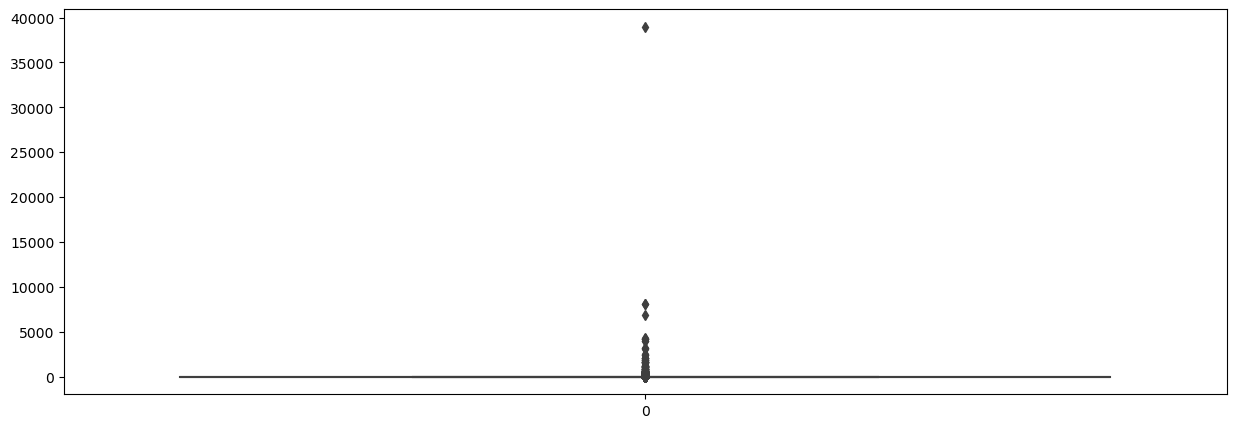

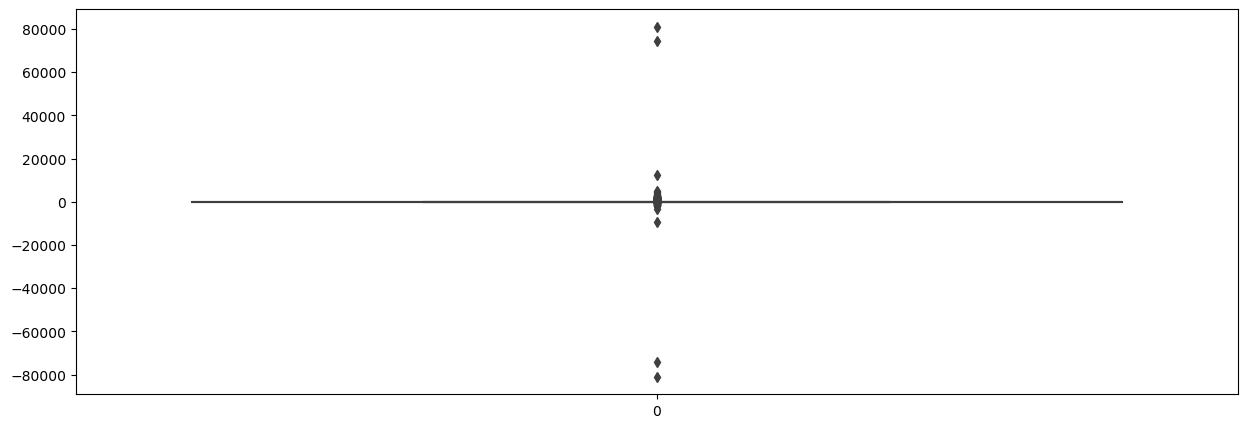

In [108]:
def boxPlot(data,degisken):
    plt.figure(figsize=(15,5))# grafik boyutu
    sns.boxplot(data[degisken])# her bir kolonun teker teker gösterme işlemi.
    plt.show()

degiskenler=["Price","Quantity"]

for i in degiskenler:
    boxPlot(data,i)

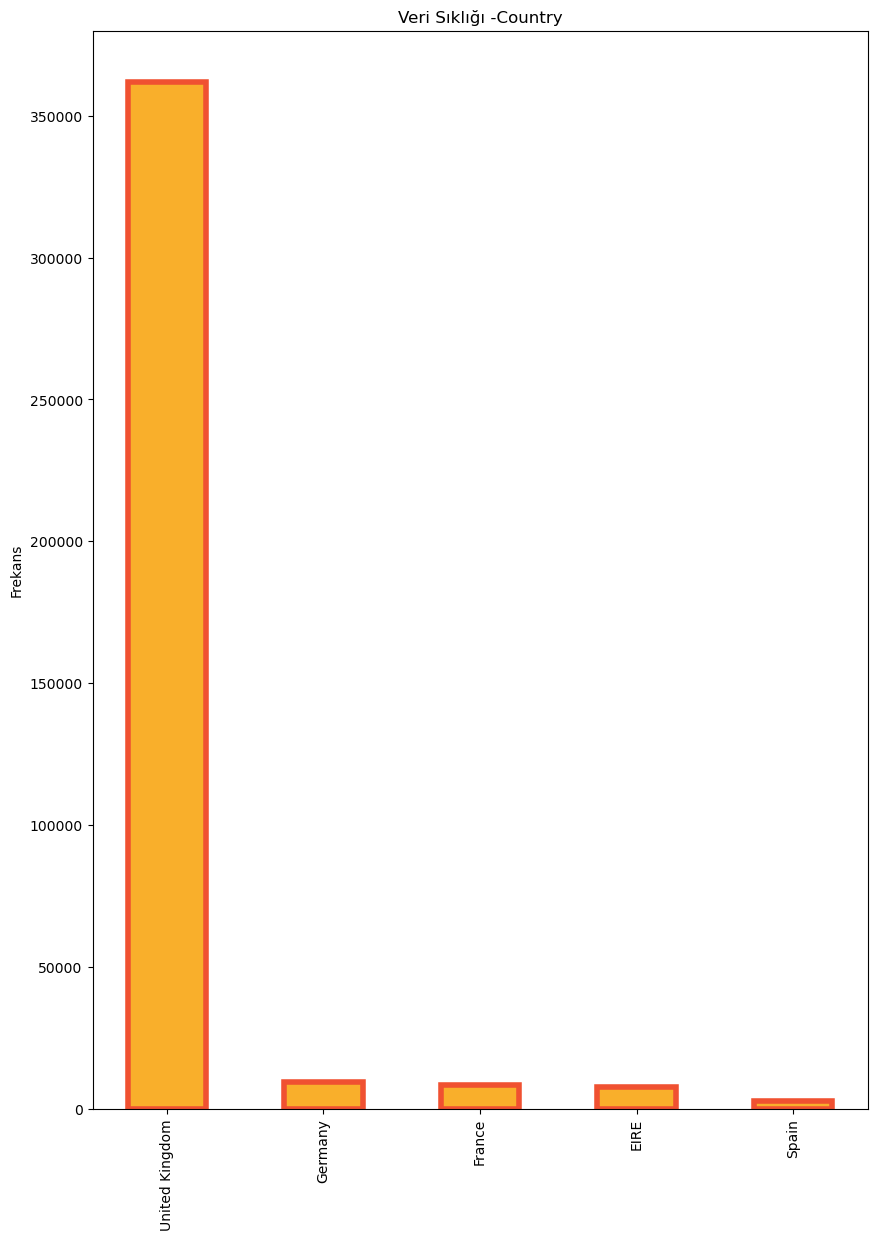

Country : 	 United Kingdom    361878
Germany             9495
France              8492
EIRE                7485
Spain               2533
Name: Country, dtype: int64


In [109]:
def barPlot(data,kategori): #fonksiyonun ne işe yaradığını ve değişkenlerin neden yazıldığnı, help(barPlot yazarak anlayabilirsiniz.)
    """Input : kategori : sutun ismi---f(features): öznitelik sayısı,-- Output:BarPlot grafiği """
    data_=data[kategori] #Bir kategoriyi(sütunu) çekiyoruz.
    kategoriSayma=data_.value_counts()#burada kategori içindeki aynı değerlerden kaç tane olduğunu sayısını alıyoruz.
    kategoriSayma=kategoriSayma[:5]#en baştan f sayısına kadar değişkene kadar uygulanacak.


    #çizdirme işlemi
    plt.figure(figsize=(10,14))#çizelecek tablonun boyutları belirledik.
    plt.bar(kategoriSayma.index,kategoriSayma,width=0.5,
        color="#f9af2b",edgecolor="#f05131",
        linewidth=4)#EdgeColor= kenar rengi , color =normal kenar rengi, linewidth=kenarın kalınlığı
    plt.xticks(kategoriSayma.index,kategoriSayma.index.values)#eksenlere olacak şeyleri belirliyoruz
    plt.xticks(rotation=90)#yazı eğikliği
    plt.ylabel("Frekans")
    plt.title(f"Veri Sıklığı -{kategori}")
    plt.show()#ekrana gösterme işlemi
    print(f"{kategori} : \t {kategoriSayma}")#altına ne olduğunu yazma 


barPlot(data,"Country")

<Figure size 1500x600 with 0 Axes>

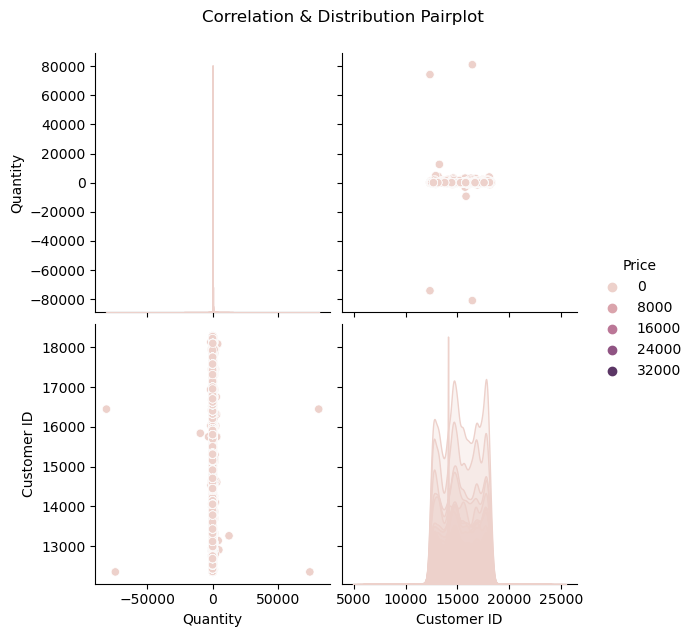

In [110]:
#pairplot
plt.figure(figsize = (15, 6))
sns.pairplot(data, hue = "Price", height = 3)
plt.suptitle("Correlation & Distribution Pairplot", y=1.05)
plt.show()

## Customer Segmentation with RFM

Recency, Frequency, Monetary kelimelerinin baş harflerinden oluşup, bu üç metriğin hesaplanmasından sonra birleştirilmesiyle meydana gelen bir skordur. Müşterilerin mevcut durumunun analiz edilip, bu skorlara göre segmentlere ayrılmasına yardımcı olur.


* Recency: Müşterinin ne kadardır websitesinden/mağazadan hizmet aldığı, ne zamandır bize üye olduğu gibi bilgileri verir. Hesaplanması genellikle, bugünden son üyelik tarihi/son sipariş tarihinin çıkartılmasıyla elde edilir.
    
    (Recency = Bugünün tarihi - Son satın alma tarihi) yani Recency değeri yani müşterinin en son satın alma gerçekleştirdiği tarih ne kadar yakınsa bizim için bir o kadar değerlidir.

* Frequency : Müşterinin toplam satın alma sayısını gösterir.

* Monetary : Müşterinin alışverişlerinde yaptığı toplam harcamadır.

In [111]:
#Tarihi daha iyi hesaplamak için bir veri dönüşümü yapalım.
data['InvoiceDate']= pd.to_datetime(data['InvoiceDate'])

data.head()

#CustomerID'ı int çevirme 

data["Customer ID"]=data["Customer ID"].astype(int)

In [112]:
#Referans tarihi belirleme

now=data["InvoiceDate"].max()
now

Timestamp('2011-12-09 12:50:00')

In [115]:
#grouby fonksiyonu ile CustomerID ile Son Satın alma tarihini bir dataFrame olarak alıyoruz.

recency_df=data.groupby(["Customer ID"],as_index=False)['InvoiceDate'].max()
recency_df.columns=["Customer ID"
                   ,"SonSatınAlma"]

recency_df.sample(20)

,Customer ID,SonSatınAlma
296,12707,2011-02-21 08:38:00
1042,13742,2011-11-23 11:07:00
672,13228,2011-09-19 14:28:00
1594,14500,2011-09-12 16:45:00
1677,14609,2011-09-28 12:54:00
3469,17044,2011-12-01 08:54:00
2310,15468,2011-11-04 13:11:00
3399,16945,2011-11-18 11:39:00
1388,14217,2011-12-08 11:53:00
1237,14012,2011-03-07 12:26:00


### RECENCY 

In [123]:
def recency_hesapla(x):
    
    now=data["InvoiceDate"].max()
    return (now-x).days

recency_df["Recency"]=recency_df["SonSatınAlma"].apply(recency_hesapla)


In [124]:
recency_df.head()

,Customer ID,SonSatınAlma,Recency
0,12346,2011-01-18 10:17:00,325
1,12347,2011-12-07 15:52:00,1
2,12348,2011-09-25 13:13:00,74
3,12349,2011-11-21 09:51:00,18
4,12350,2011-02-02 16:01:00,309


In [125]:
#Artık Son satınAlma kolonuna ihtiyacımız yok.
recency_df.drop(columns=["SonSatınAlma"],inplace=True)

recency_df

,Customer ID,Recency
0,12346,325
1,12347,1
2,12348,74
3,12349,18
4,12350,309
...,...,...
4367,18280,277
4368,18281,180
4369,18282,7
4370,18283,3


### Frequency

In [126]:
#Şimdi Frequency kısmını inceleyelim.
#Amacımız kopyaları düşürüp,kaç defa fatura oluşturduğunu inceleyip satın alma sıklığını hesaplamak.

data2=data.copy()
data2.drop_duplicates(subset=["Invoice","Customer ID"],keep="first",inplace=True)

print(f"İlk datanın boyutları {data.shape} kopyaları düşürdükten sonraki {data2.shape}")



İlk datanın boyutları (406830, 9) kopyaları düşürdükten sonraki (22190, 9)


In [127]:
#Sıklıklığı(Frequency) hesaplama
frequency_df=data2.groupby("Customer ID",as_index=False)["Invoice"].count()

#kolon adlarını belirleme
frequency_df.columns=['Customer ID','Frequency']
frequency_df.sample(7)

,Customer ID,Frequency
3502,17085,6
3807,17517,1
547,13059,1
430,12888,4
4264,18144,12
2378,15561,5
391,12837,1


In [128]:
#En sıklıkla alışveriş yapan müşteriyi bulma
frequency_df["Frequency"].sort_values(ascending=False)

1895    248
330     224
4042    169
1674    128
568     118
       ... 
1141      1
2997      1
1142      1
1149      1
990       1
Name: Frequency, Length: 4372, dtype: int64

### Monetary

In [129]:
#Toplam parayı hesaplama
data['Total_cost'] = data['Price'] *data['Quantity']
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total_cost
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [130]:
#Sırada Monetary var.
monetary_df=data.groupby('Customer ID',as_index=False)['Total_cost'].sum()
monetary_df.columns = ['Customer ID','Monetary']

monetary_df.tail(5)

,Customer ID,Monetary
4367,18280,180.60
4368,18281,80.82
4369,18282,176.60
4370,18283,2094.88
4371,18287,1837.28


In [131]:
#Şimdi de en çok para harcayan müşterileri görelim.
monetary_df["Monetary"].sort_values(ascending=False)

1703    279489.02
4233    256438.49
3758    187482.17
1895    132572.62
55      123725.45
          ...    
125      -1126.00
3870     -1165.30
1384     -1192.20
2236     -1592.49
3756     -4287.63
Name: Monetary, Length: 4372, dtype: float64

### Tüm dataframe'leri birleştirme

In [134]:
rf=recency_df.merge(frequency_df,left_on="Customer ID",right_on="Customer ID")

rf

#Ardından monetary ekleyelim.
rfm=rf.merge(monetary_df,left_on="Customer ID",right_on="Customer ID")

rfm.set_index('Customer ID',inplace=True)
rfm.head()

,Recency,Frequency,Monetary
Customer ID,,,
12346,325,2,0.00
12347,1,7,4310.00
12348,74,4,1797.24
12349,18,1,1757.55
12350,309,1,334.40


### K-Means ile grup sayısına karar verme

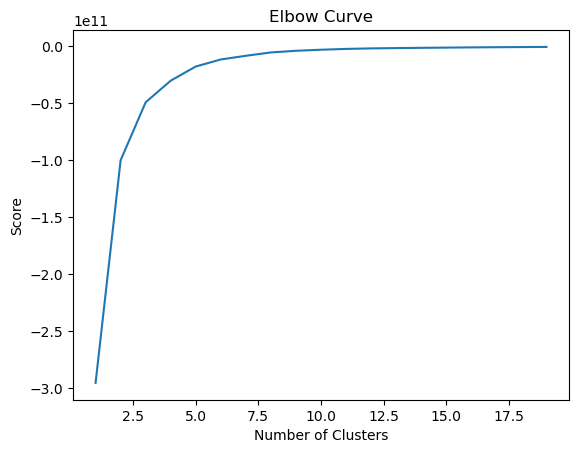

In [135]:
rfm_segmentation = rfm.copy()
from sklearn.cluster import KMeans
# get right number of cluster for K-means so we neeed to loop from 1 to 20 number of cluster and check score.
#Elbow method is used to represnt that. 
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(rfm_segmentation).score(rfm_segmentation) for i in range(len(kmeans))]
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [137]:
#fitting data in Kmeans theorem
kmeans = KMeans(n_clusters=3, random_state=0).fit(rfm_segmentation)
# label each row of the dataset with kmeans clusters.
rfm_segmentation['cluster'] = kmeans.labels_
rfm_segmentation[rfm_segmentation.cluster == 0].head()

,Recency,Frequency,Monetary,cluster
Customer ID,,,,
12346,325,2,0.00,0
12347,1,7,4310.00,0
12348,74,4,1797.24,0
12349,18,1,1757.55,0
12350,309,1,334.40,0


In [138]:
rfm_segmentation['cluster'].value_counts()
#Görüldüğü yaptığımız kümeleme oldukça imbalance bir veri setine dönüştü.K-Means iyi bir sonuç vermedi.



0    4346
2      23
1       3
Name: cluster, dtype: int64

### Kaç tane küme oluşturacağımızı sklearn kütüphanesindeki silhouette analysis ile yardım alacağız.



In [141]:
from sklearn.metrics import silhouette_score
sınıf_sayıları = [2, 3, 4, 5, 6, 7, 8]

for kume_sayısı in sınıf_sayıları:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=kume_sayısı, max_iter=50)
    kmeans.fit(rfm_segmentation)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(rfm_segmentation, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(kume_sayısı, silhouette_avg))

For n_clusters=2, the silhouette score is 0.9863338934995082
For n_clusters=3, the silhouette score is 0.9630669182645959
For n_clusters=4, the silhouette score is 0.8842057494076024
For n_clusters=5, the silhouette score is 0.8159611864251107
For n_clusters=6, the silhouette score is 0.7719698149806833
For n_clusters=7, the silhouette score is 0.7735020256334088
For n_clusters=8, the silhouette score is 0.7215942425116577


In [142]:
#5 sınıfa dönüştürelim. Ve sonuçları inceleyelim.
kmeans = KMeans(n_clusters=5, random_state=0).fit(rfm_segmentation)

#kümelerini de işaretleyelim.
rfm_segmentation['cluster'] = kmeans.labels_
rfm_segmentation[rfm_segmentation.cluster == 0].head()

,Recency,Frequency,Monetary,cluster
Customer ID,,,,
12346,325,2,0.00,0
12347,1,7,4310.00,0
12348,74,4,1797.24,0
12349,18,1,1757.55,0
12350,309,1,334.40,0


In [143]:
#Görüldüğü üzere yine bi imbalance bir data ile karşı karşıyayız.
rfm_segmentation['cluster'].value_counts()


0    4071
4     267
3      27
2       5
1       2
Name: cluster, dtype: int64

### Lifetime Kütüphanesi kullanarak daha hızlı sonuç almak


Burada en baştan başlayarak Lifetime kütüphanesini de kullanarak daha iyi sonuç almaya çalışacağız.

In [161]:
!pip install lifetimes

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 584.2/584.2 kB 10.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 5.5 MB/s eta 0:00:00


In [144]:
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total_cost
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [145]:
data.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
Total_cost     0
dtype: int64

In [148]:
data = data[data['Quantity'] > 0 ] # 0 değerine Miktar kolonundaki değerleri sınırla 
df = data[data['Price'] > 0] # 0 değerine Değer kolonu çıkar 
df = data[~data['Invoice'].str.contains("C",na=False)]  #C, iade edilen siparişleri de istemediğimizi gösterir.

### Aykırı değer analizi yapalım.

In [153]:
def find_boundaries(df, variable,q1=0.05,q2=0.95):
    lower_boundary = df[variable].quantile(q1) # alt sınır
    upper_boundary = df[variable].quantile(q2) # üst sınır
    return upper_boundary, lower_boundary
def capping_outliers(df,variable):
    upper_boundary,lower_boundary =  find_boundaries(df,variable)
    df[variable] = np.where(df[variable] > upper_boundary, upper_boundary,
                       np.where(df[variable] < lower_boundary, lower_boundary, df[variable]))

In [157]:
#Aykırı değer analizi ilgili kolonlara uygulayalım.
capping_outliers(data,'Price')
capping_outliers(data,'Quantity')

In [158]:
data.shape

(397925, 9)

In [166]:
from lifetimes.utils import summary_data_from_transaction_data
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def RClass(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def FMClass(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

grp_df = df.groupby('Customer ID').Total_cost.sum().sort_values(ascending = False)

lf_data = summary_data_from_transaction_data(
    df, 'Customer ID', 'InvoiceDate', monetary_value_col = 'Total_cost', 
    observation_period_end = now)

 
lf_data['frequency']=lf_data['frequency'].astype(int)
lf_data['recency']=lf_data['recency'].astype(int)
lf_data['T']=lf_data['T'].astype(int)
lf_data['monetary_value']=lf_data['monetary_value'].astype(int)

lf_data.head()

,frequency,recency,T,monetary_value
Customer ID,,,,
12346,0,0,325,0
12347,6,365,367,599
12348,3,283,358,301
12349,0,0,18,0
12350,0,0,310,0


RFM KÜMELERİMİZİ BELİRLEYELİM :

r'[1-2][1-2]': 'Hibernate',

r'[1-2][3-4]': 'Risk',

r'[1-2]5': 'Cant Lose',

r'3[1-2]': 'Sleeper',

r'[3-3']: 'Need Attention',

r'[3-4][4-5]': 'Loyal',

r'41': 'Promising',

r'51': 'New Customer',

r'[4-5][2-3]': 'High Potential',

r'5[4-5]': 'Champion'

In [167]:
quantiles = lf_data.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

rfmSegmentation = lf_data

rfmSegmentation['R_Quartile'] = rfmSegmentation['recency'].apply(RClass, args=('recency',quantiles,))
rfmSegmentation['F_Quartile'] = rfmSegmentation['frequency'].apply(FMClass, args=('frequency',quantiles,))
rfmSegmentation['M_Quartile'] = rfmSegmentation['monetary_value'].apply(FMClass, args=('monetary_value',quantiles,))

#labeling classes
rfmSegmentation['RFMClass'] = rfmSegmentation.R_Quartile.map(str) \
                            + rfmSegmentation.F_Quartile.map(str) \
                            + rfmSegmentation.M_Quartile.map(str)
 
segt_map = {
    r'[1-2][1-2]': 'Hibernate',
    r'[1-2][3-4]': 'Risk', 
    r'[1-2]5': 'Cant Lose',
    r'3[1-2]': 'Sleeper', 
    r'33': 'Need Attention',
    r'[3-4][4-5]': 'Loyal',
    r'41': 'Promising',
    r'51': 'New Customer',
    r'[4-5][2-3]': 'High Potential',
    r'5[4-5]': 'Champion'
}

rfmSegmentation['Segment'] = rfmSegmentation['R_Quartile'].map(str) + rfmSegmentation['F_Quartile'].map(str)
rfmSegmentation['Segment'] =  rfmSegmentation['Segment'].replace(segt_map, regex=True)

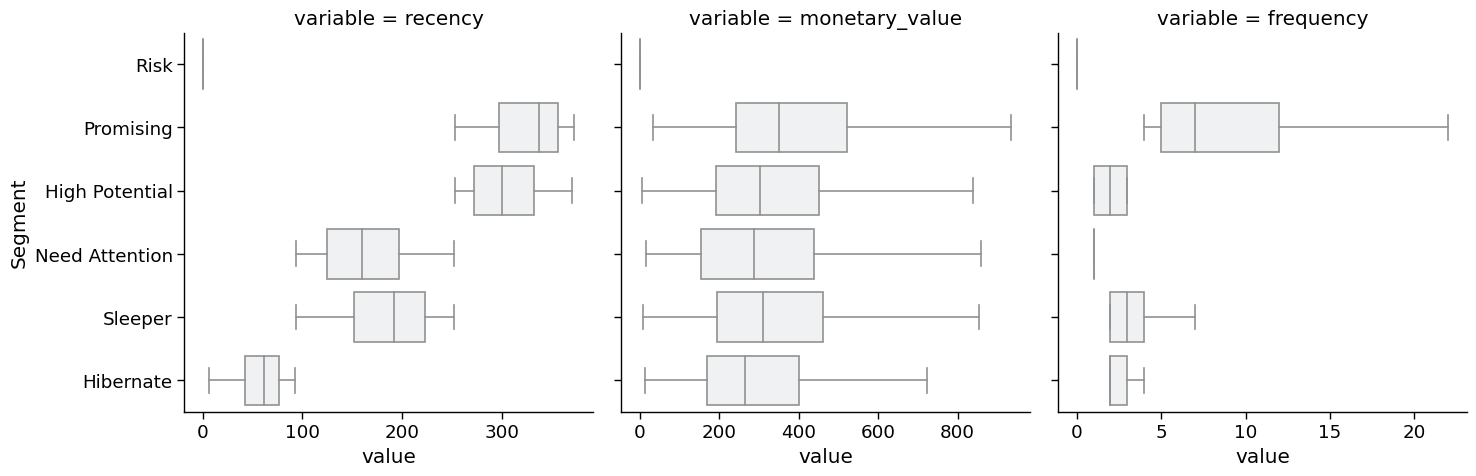

In [169]:
#Creating a final boxplot to see how each segment differentiates
features = ['recency','monetary_value','frequency','Segment']
summary = rfmSegmentation[features].melt(id_vars=['Segment']) 

sns.set_context(context = 'paper',font_scale=1.5)
g = sns.FacetGrid(summary, col="variable",sharex=False,height=5)
g.map_dataframe(sns.boxplot, x="value", y="Segment",hue='variable',showfliers=False)

In [ ]:
#Done.